# Setup

In [21]:
%matplotlib notebook
import pandas as pd
import scipy.stats as stats
import numpy as np
import cufflinks as cf
import plotly
import matplotlib.pyplot as plt
import plotly.plotly as py

In [22]:
df = pd.read_csv("../Datasets/indeed_job_dataset.csv")
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [24]:
df_main = df[['Job_Title', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'Location', 'Company_Industry']]
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


# Exploring Data with a Graph Function

In [25]:
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0


In [26]:
def Industrygraph(data,var1,var2):
    df = pd.DataFrame(data.groupby([var1])[var2].value_counts())
    df.columns = [f"{var2} Count"]
    df = df.reset_index().set_index(var1).pivot(columns = var2, values = f"{var2} Count").fillna(0)
    df["Total"] = 0
    for column in df.columns:
        df["Total"] = df["Total"] + df[column]
    df = df.sort_values("Total", ascending = False)
    df = df.drop("Total", 1)
    df.plot.bar(title = f"Count of {var2} by {var1}", figsize = (10, 6), rot = 0, fontsize = 8)
    plt.tight_layout()
    plt.savefig(f"Bar Graphs/{var2} vs {var1} Bar Graph.png")
    
    '''
    "data" - dataframe that you are interested in
    var1 - column of "data" w/independent categorical variable
    var2 - column of "data" w/dependent categorical variable
    
    Function displays and saves a figure with a bar chart where the x-axis is
    categories of var1 and the y-axis is counts of var2.
    '''

In [151]:
#Made a special function for income comparisons so that income categories are displayed in the correct order

def Industrygraph2(data,var1,var2):
    df = pd.DataFrame(data.groupby([var1])[var2].value_counts())
    df.columns = [f"{var2} Count"]
    df = df.reset_index().set_index(var1).pivot(columns = var2, values = f"{var2} Count").fillna(0)
    df["Total"] = 0
    for column in df.columns:
        df["Total"] = df["Total"] + df[column]
    df = df.sort_values("Total", ascending = False)
    df = df.drop("Total", 1)
    
    
    df.columns = [">160000","140000-159999","120000-139999","100000-119999","80000-99999","<80000"] #This is the only difference
    
    
    df.plot.bar(title = f"Count of {var2} by {var1}", figsize = (10, 6), rot = 45, fontsize = 8)
    plt.tight_layout()
    plt.savefig(f"Bar Graphs/{var2} vs {var1} Bar Graph.png")
    
    '''
    "data" - dataframe that you are interested in
    var1 - column of "data" w/independent categorical variable
    var2 - column of "data" w/dependent categorical variable
    
    Function displays and saves a figure with a bar chart where the x-axis is
    categories of var1 and the y-axis is counts of var2.
    '''

In [28]:
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


<IPython.core.display.Javascript object>


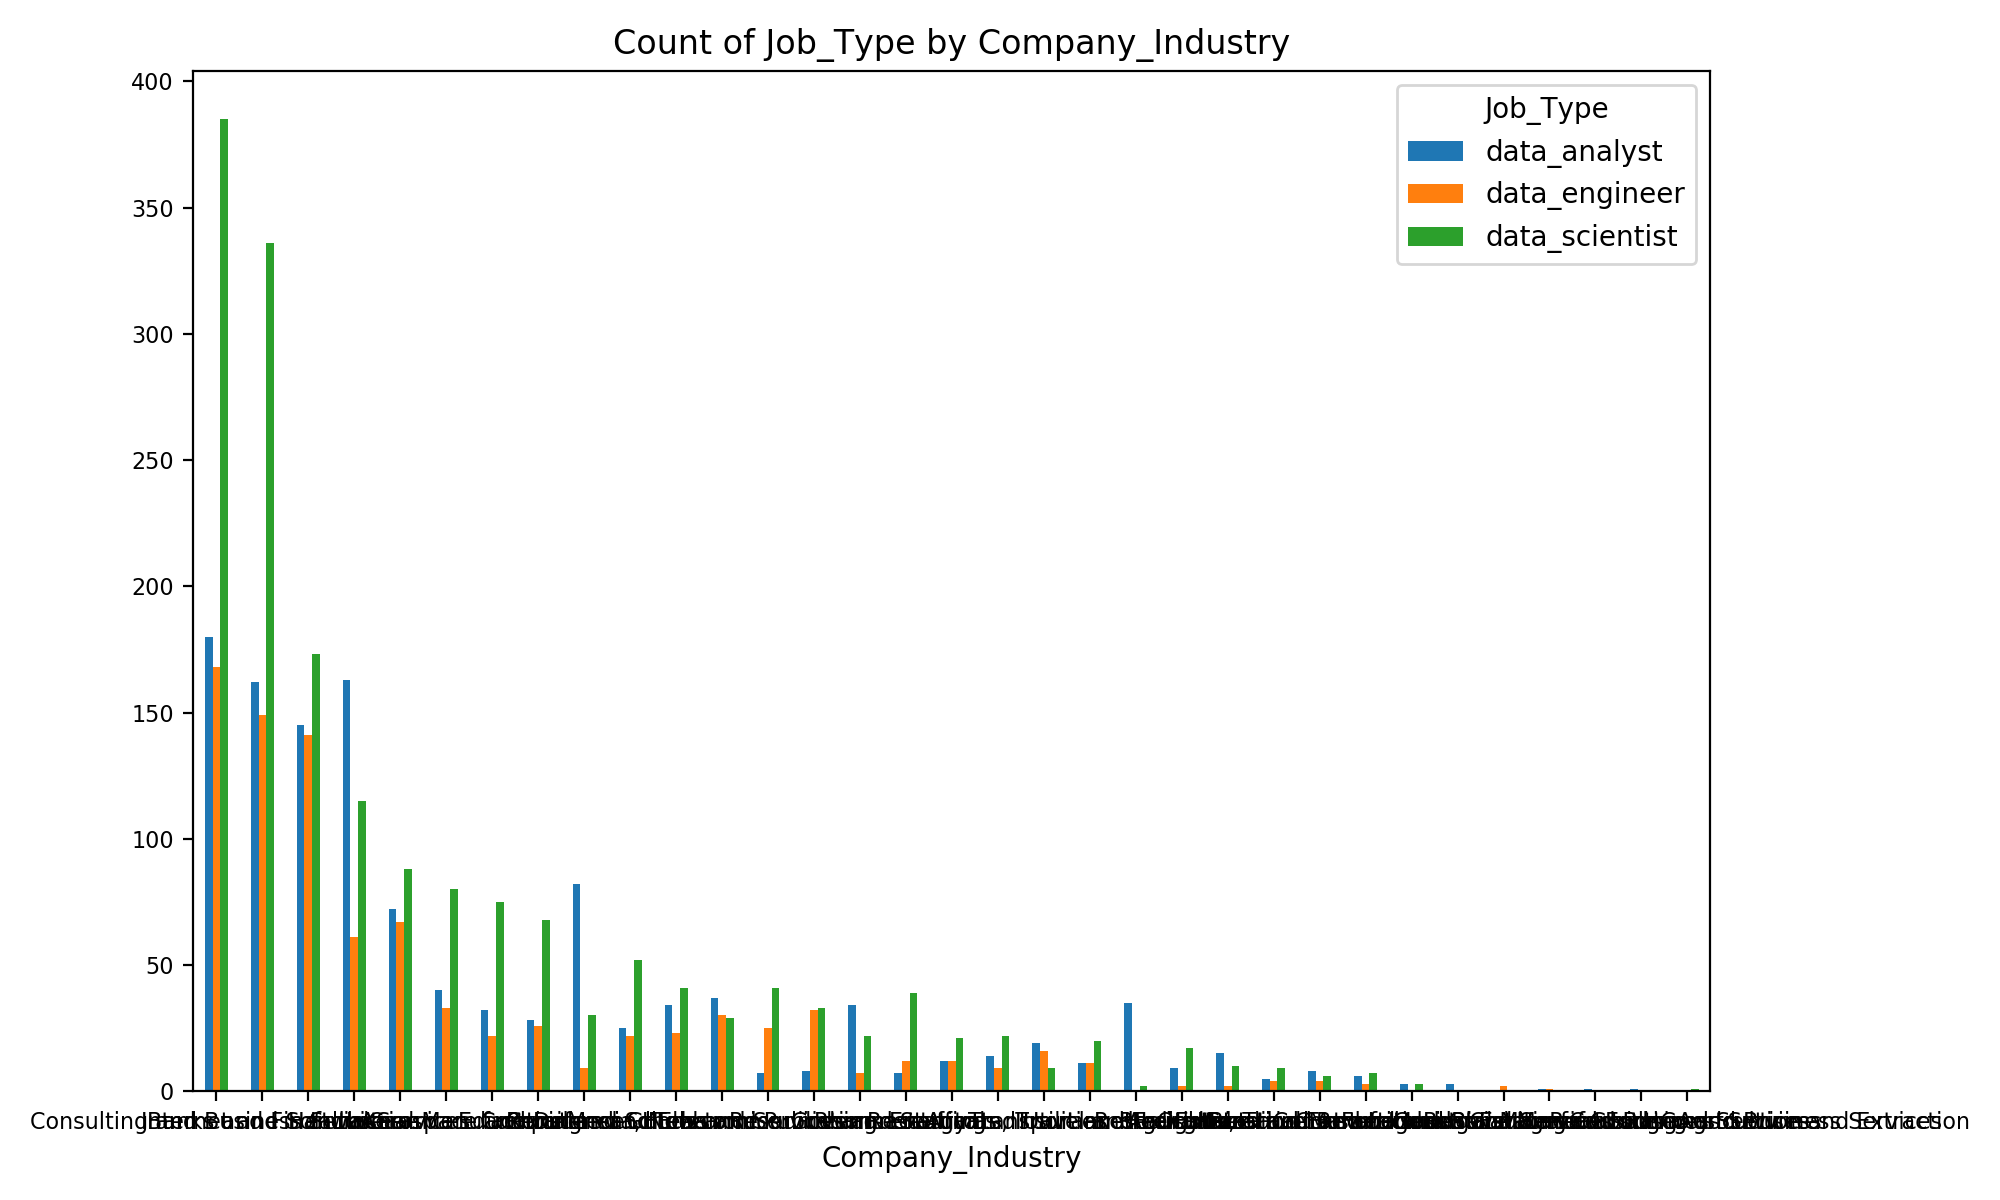

In [152]:
Industrygraph(df,"Company_Industry","Job_Type")

In [34]:
df["Queried_Salary"].value_counts()

100000-119999    1394
120000-139999    1292
80000-99999       953
140000-159999     873
<80000            788
>160000           415
Name: Queried_Salary, dtype: int64

<IPython.core.display.Javascript object>


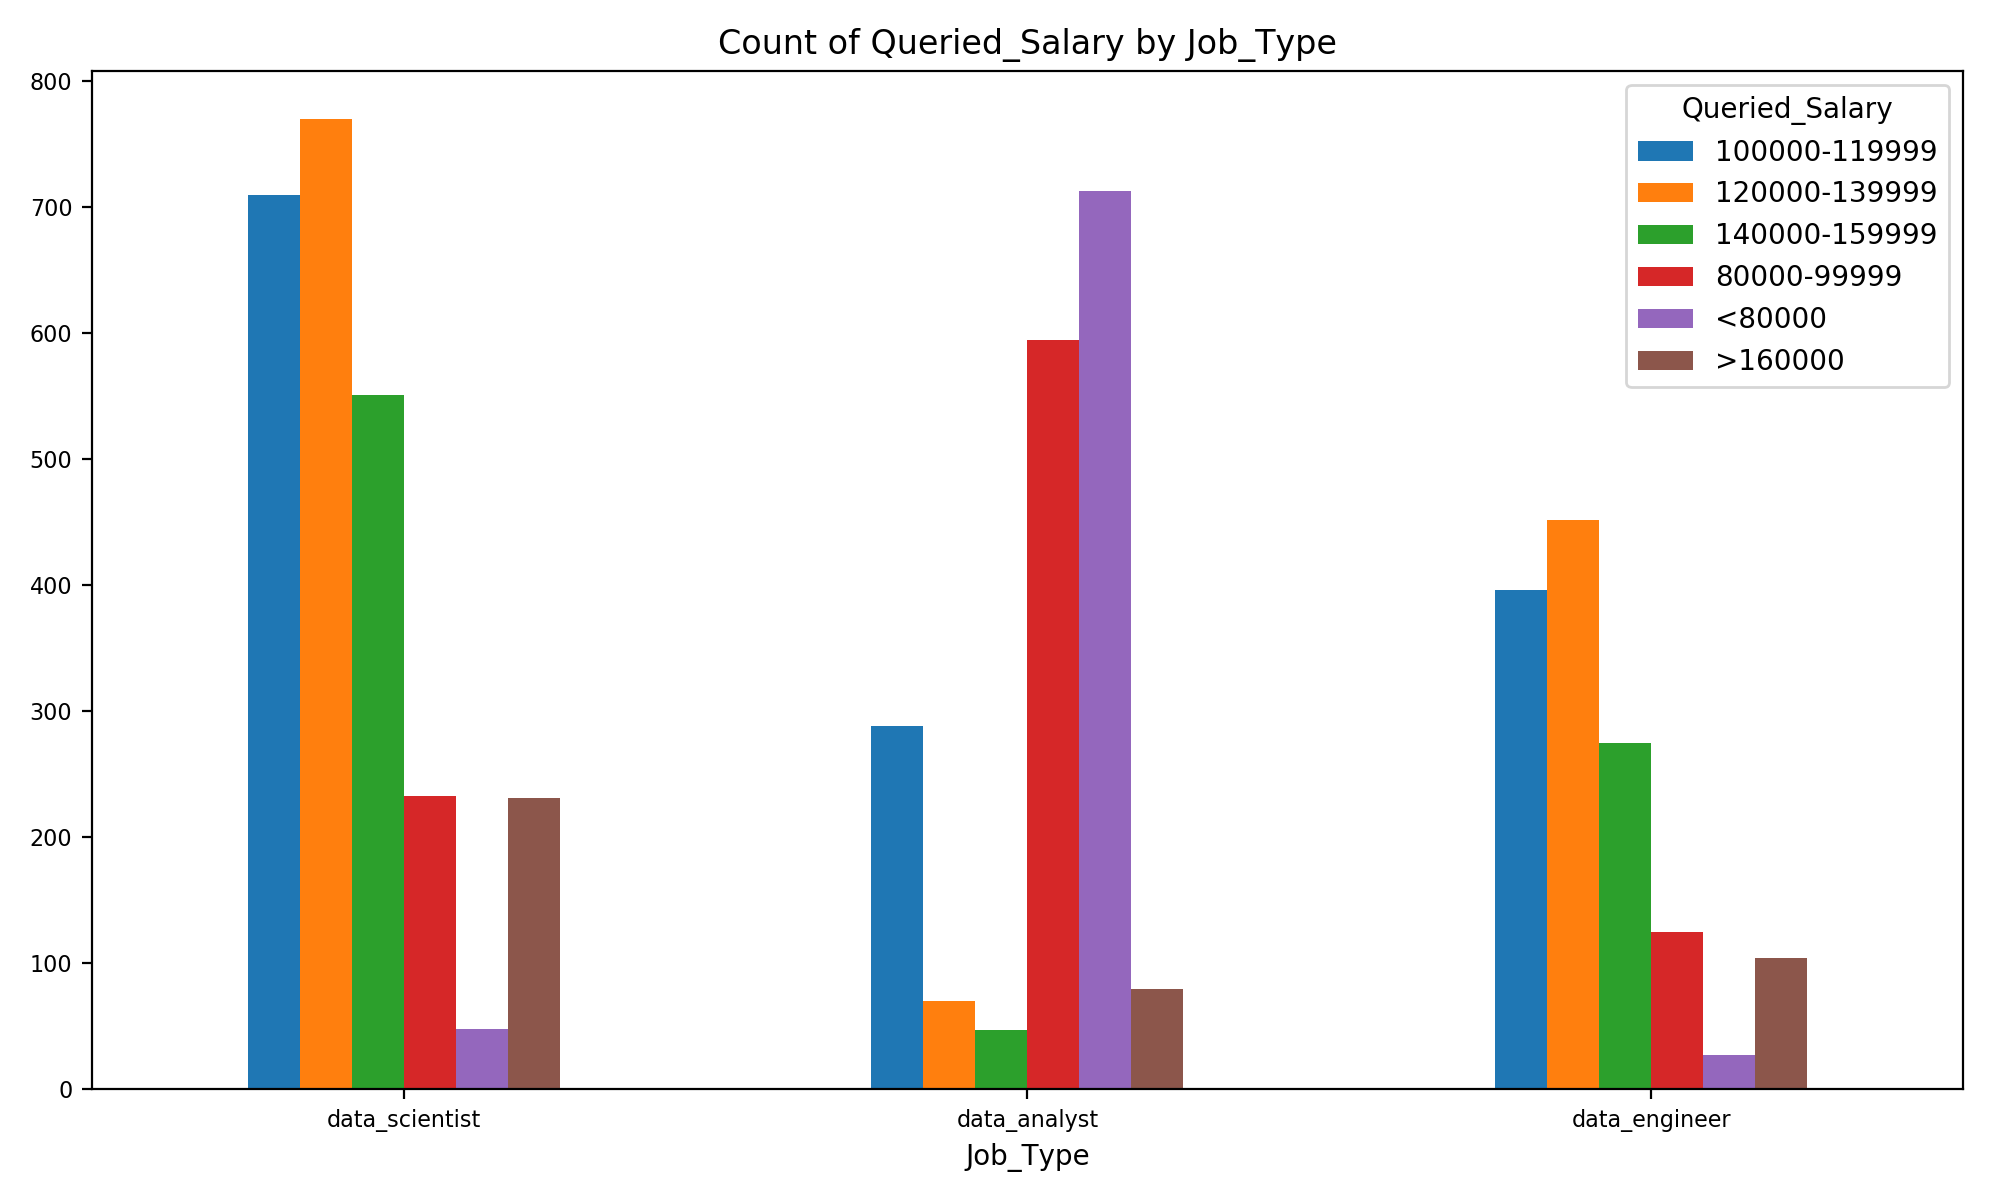

In [29]:
example1 = Industrygraph(df_main,"Job_Type","Queried_Salary")

<IPython.core.display.Javascript object>


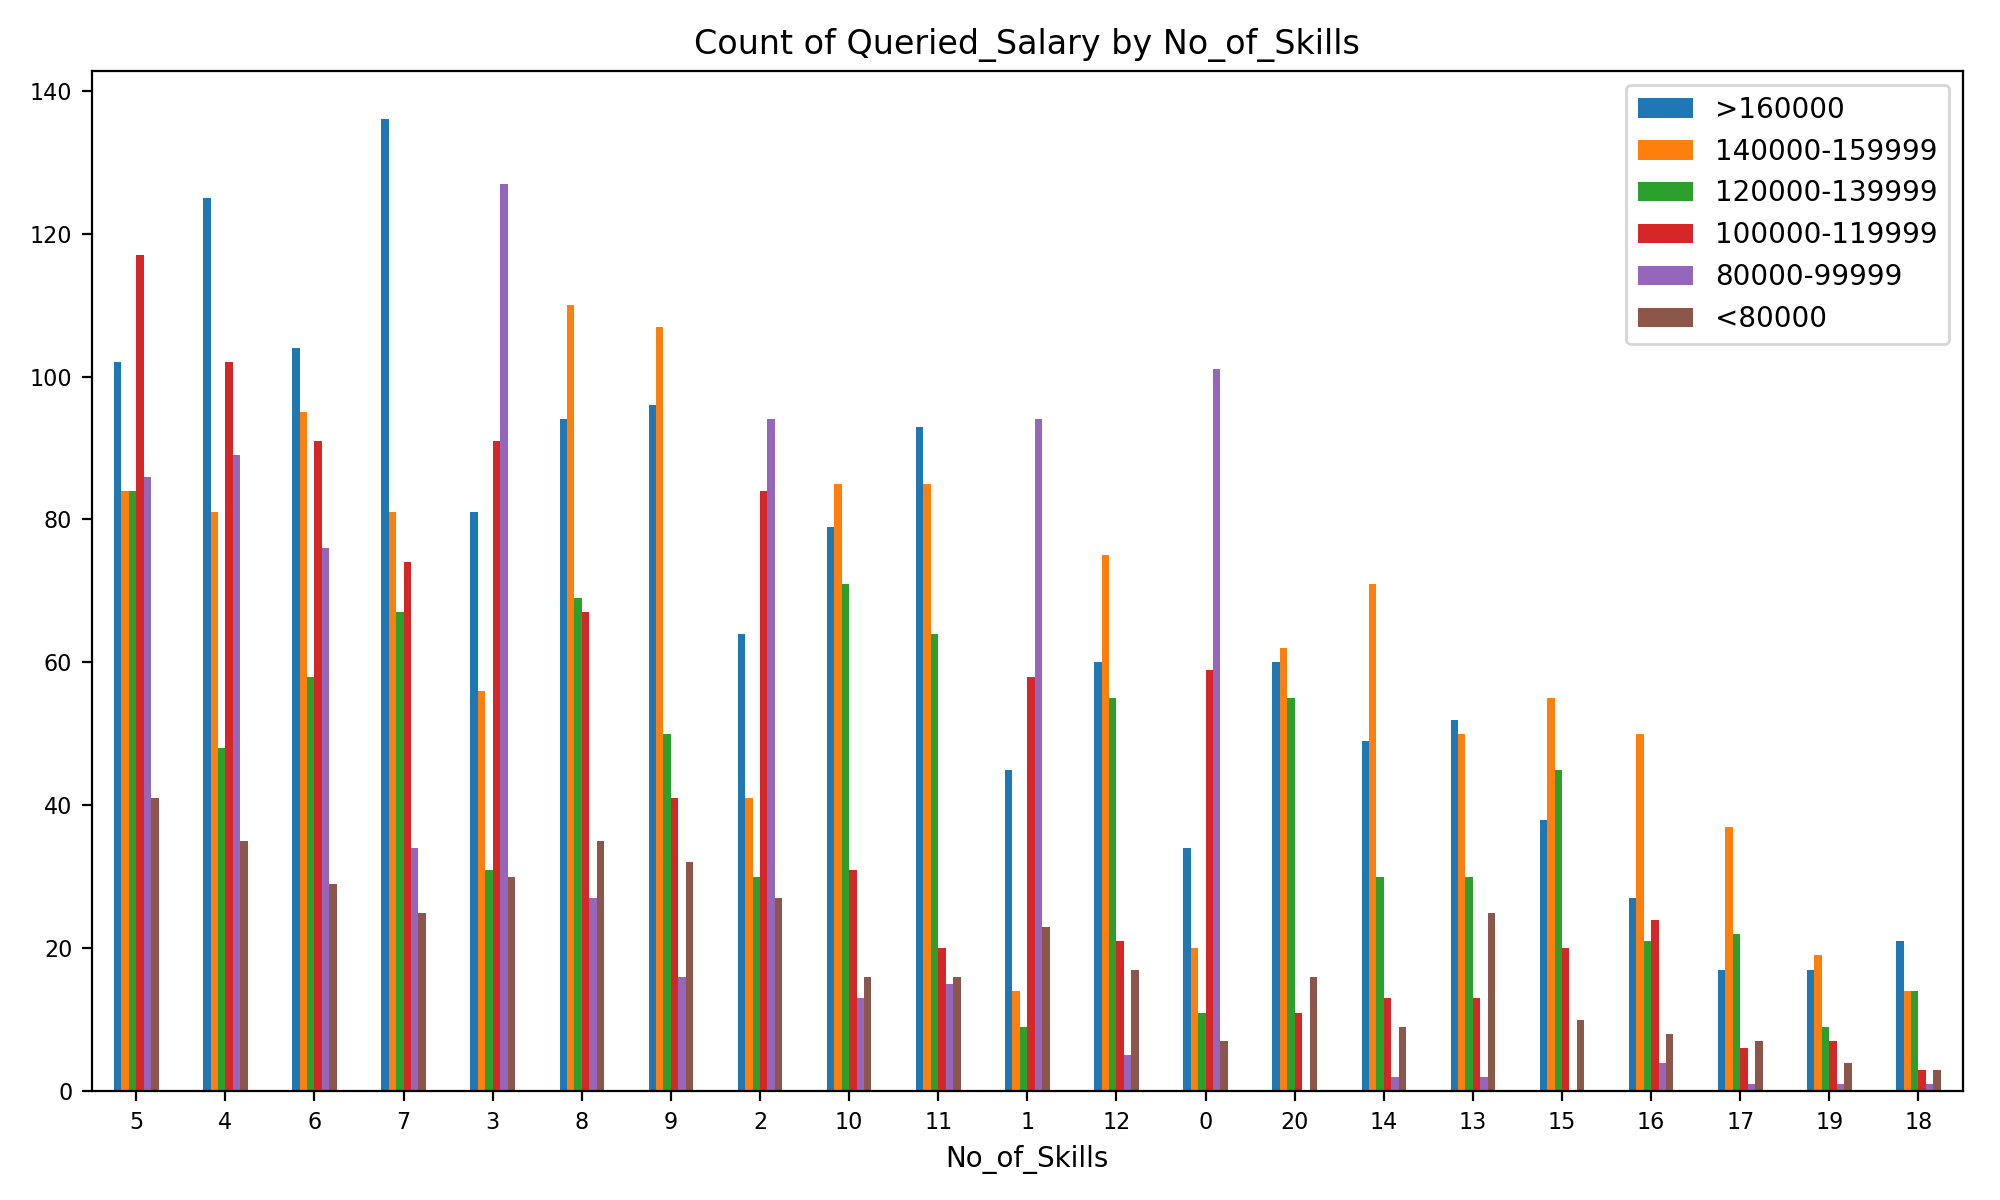

In [36]:
example2 = Industrygraph2(df_main,"No_of_Skills","Queried_Salary")

# Top industries only

In [37]:
df_industry = df.loc[(df["Company_Industry"] == "Consulting and Business Services") | (
                    df["Company_Industry"] == "Internet and Software") | (
                    df["Company_Industry"] == "Banks and Financial Services") | (
                    df["Company_Industry"] == "Health Care") | (
                    df["Company_Industry"] == "Insurance"),:]
df_industry["Company_Industry"].value_counts()

Consulting and Business Services    733
Internet and Software               647
Banks and Financial Services        459
Health Care                         339
Insurance                           227
Name: Company_Industry, dtype: int64

<IPython.core.display.Javascript object>


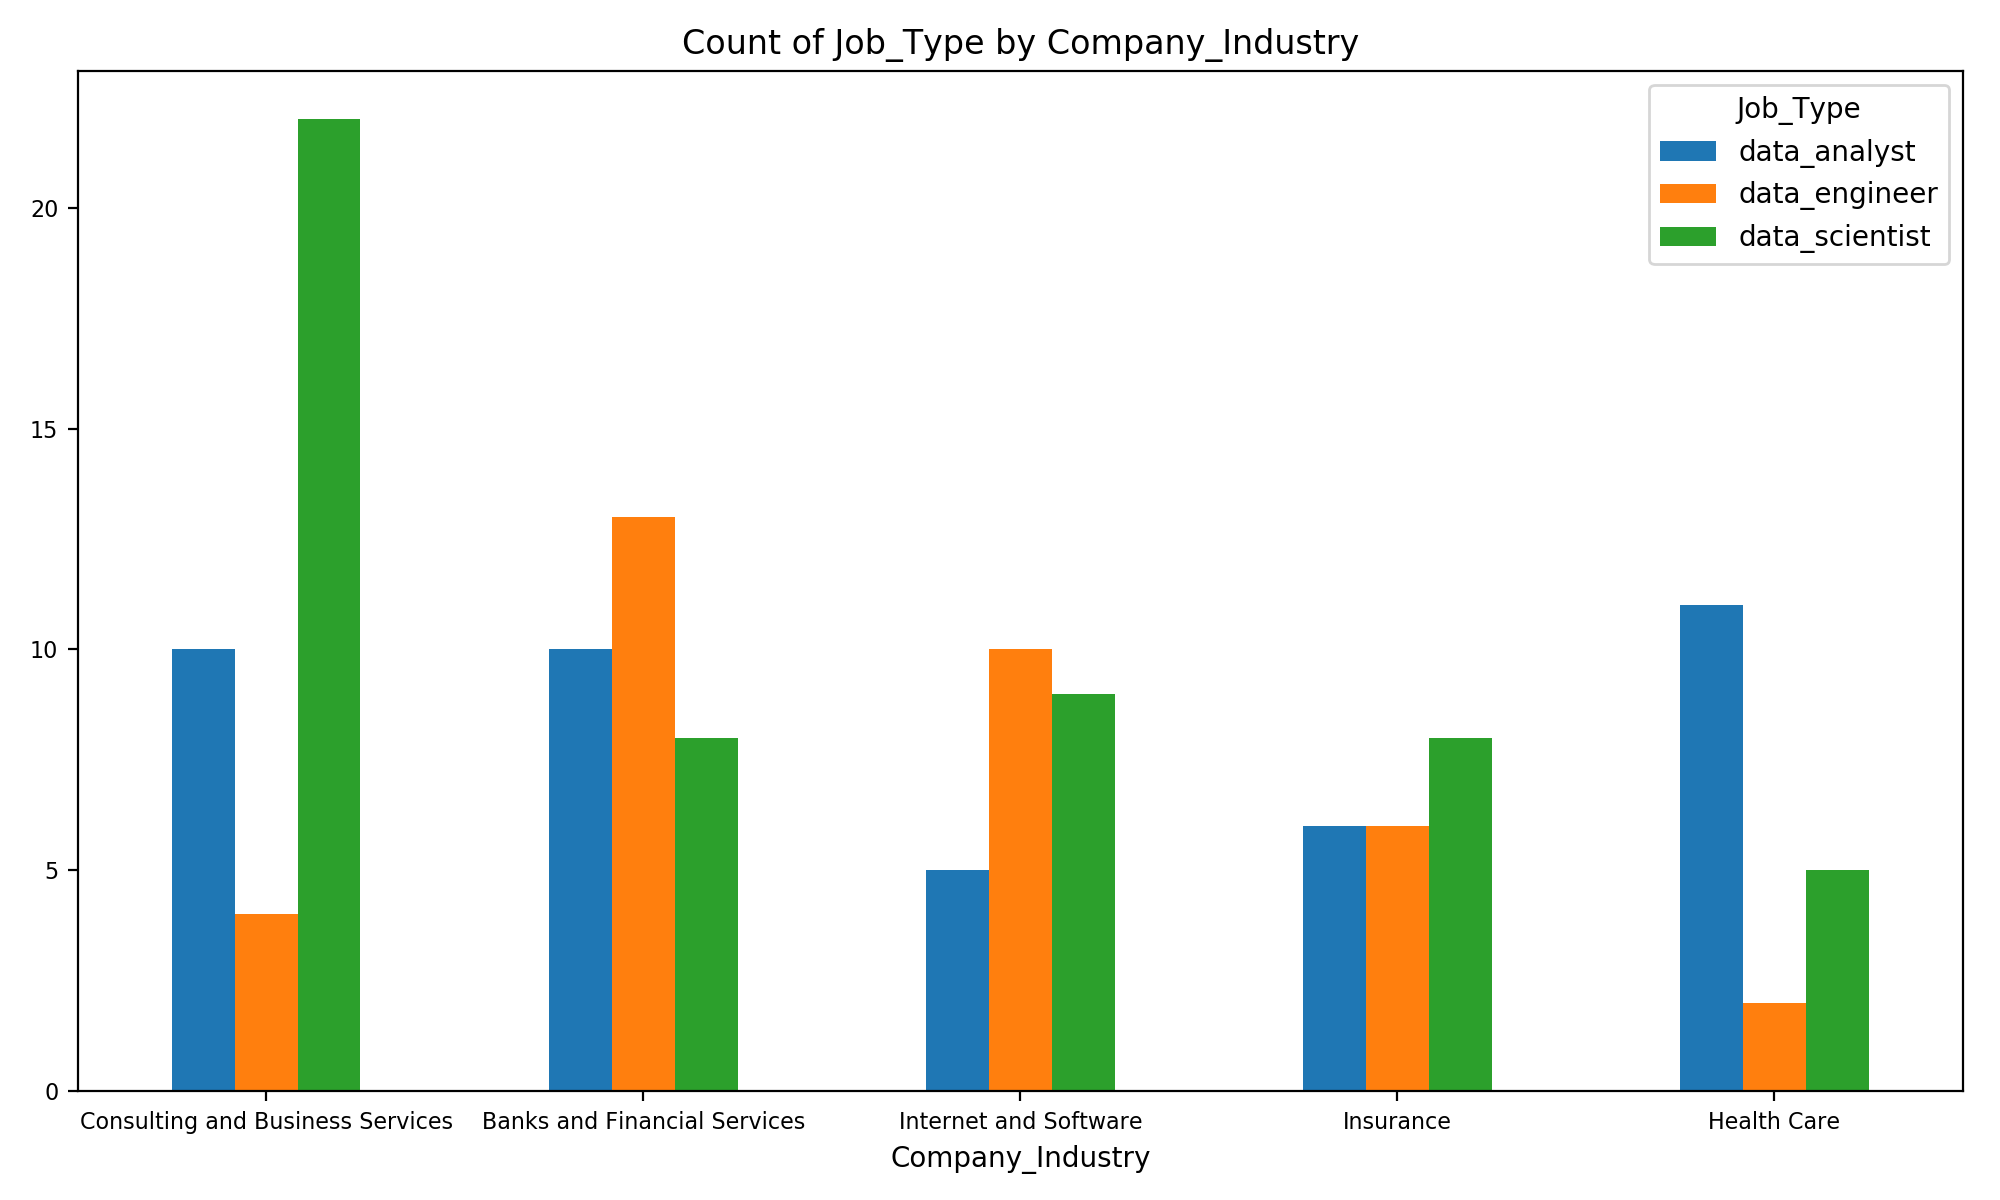

In [73]:
Industrygraph(df_industry, "Company_Industry", "Job_Type")

<IPython.core.display.Javascript object>


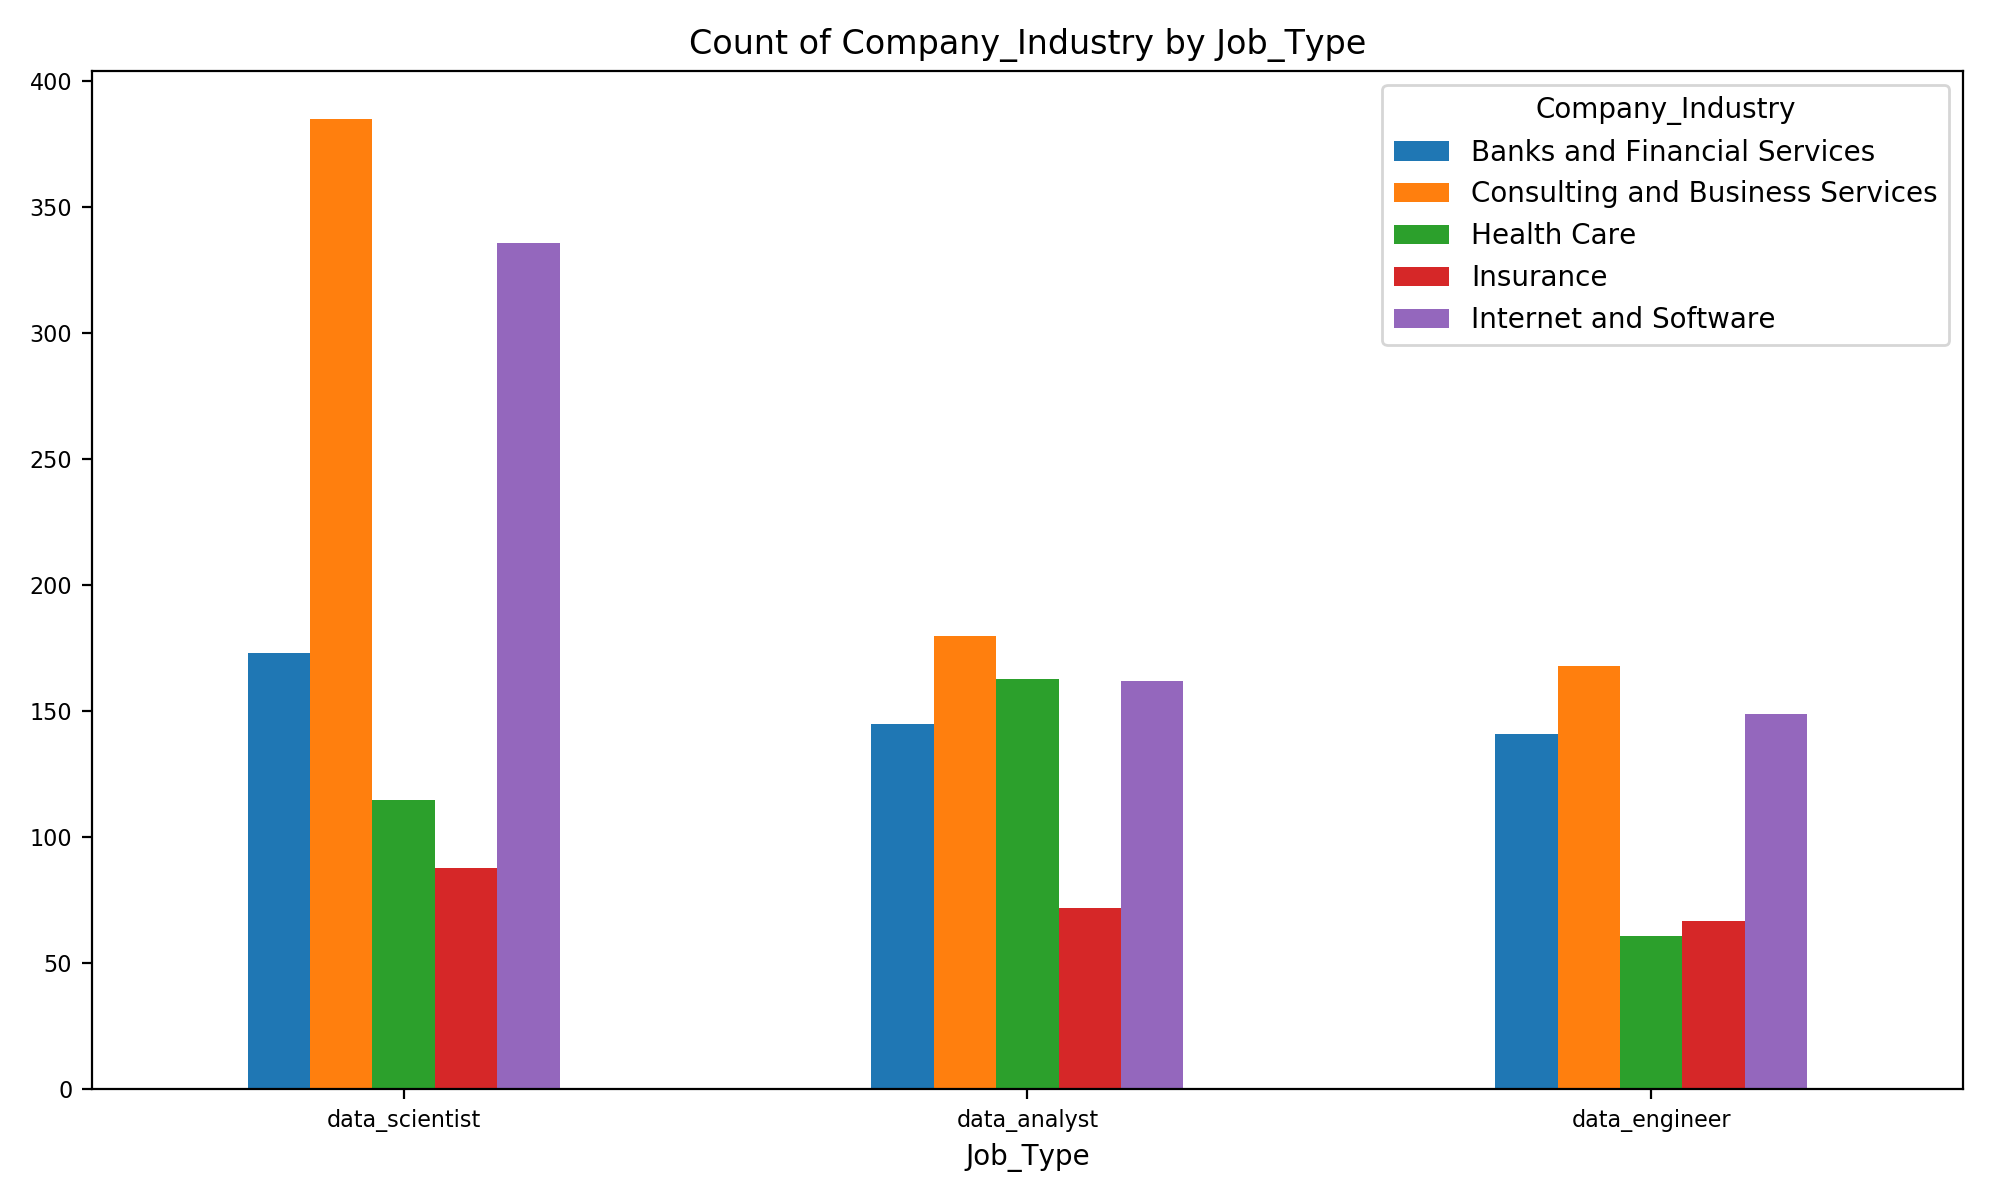

In [44]:
Industrygraph(df_industry, "Job_Type", "Company_Industry")

<IPython.core.display.Javascript object>


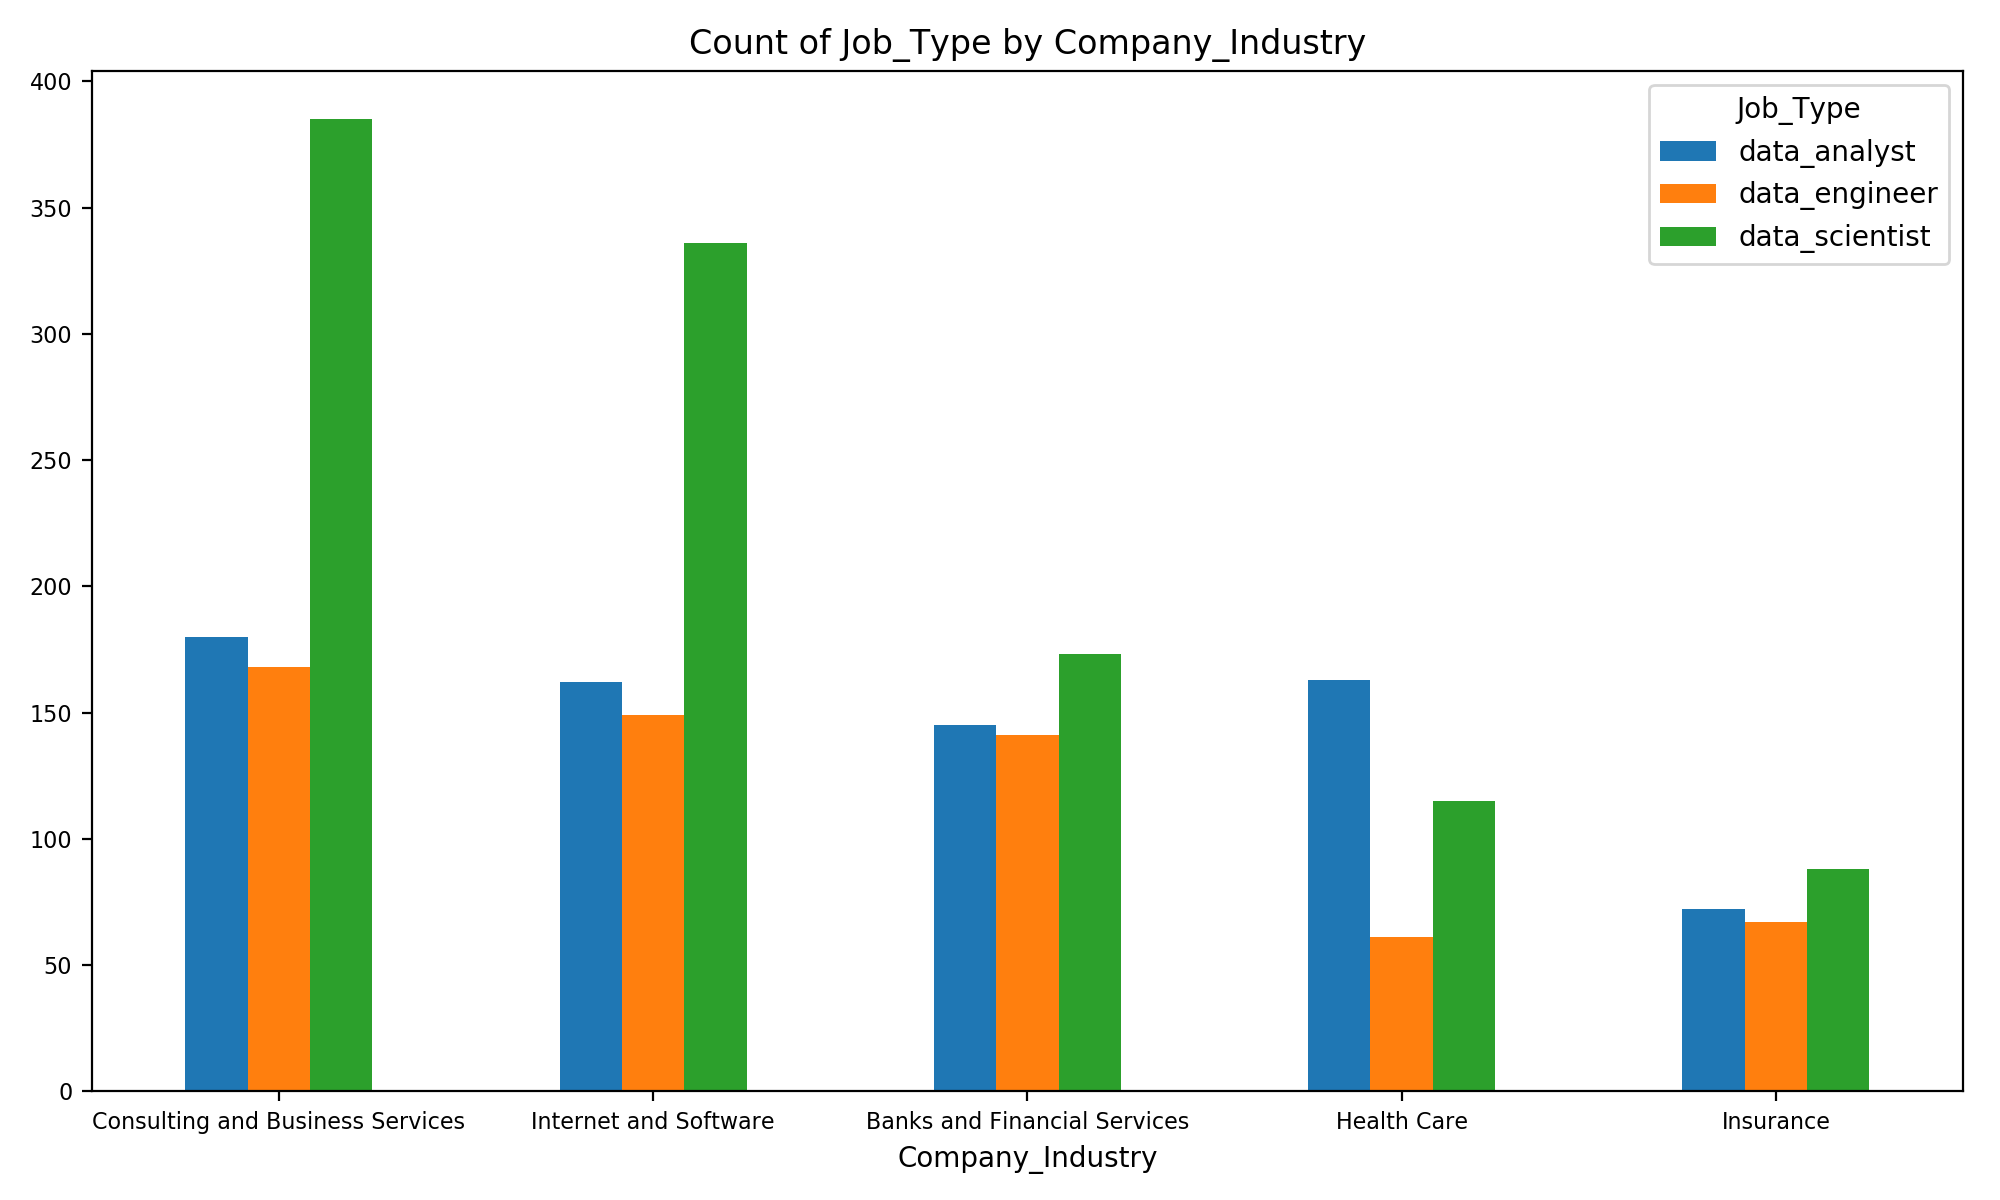

In [45]:
Industrygraph(df_industry, "Company_Industry","Job_Type")

In [58]:
df_texas = df_industry.loc[df_industry["Location"] == "TX",:]

In [59]:
df_texas["Queried_Salary"].value_counts()

100000-119999    47
120000-139999    29
<80000           24
80000-99999      18
140000-159999     9
>160000           2
Name: Queried_Salary, dtype: int64

In [60]:
df_texas.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
139,139,Data Scientist,https://www.indeed.com/rc/clk?jk=fc5bfd6e0b3df...,80000-99999,data_scientist,['Microsoft Office'],1,Universal Consulting Services,23.0,3.6,...,0,0,0,0,1,0,0,0,0,0
151,151,Enterprise Data Scientist,https://www.indeed.com/rc/clk?jk=940b69ab98429...,80000-99999,data_scientist,"['Statistical Software', 'Microsoft Powerpoint...",7,Parkland Health & Hospital System,816.0,3.9,...,0,0,0,0,0,0,0,1,0,0
168,168,Data Scientist I - Agent Based Modeler (Java/P...,https://www.indeed.com/rc/clk?jk=551178f123e1e...,80000-99999,data_scientist,"['Java', 'Machine Learning', 'Python']",3,USAA,2174.0,4.0,...,0,0,0,0,0,0,0,0,1,0
169,169,Federal - Data Scientist,https://www.indeed.com/rc/clk?jk=ccc04fe2d72d3...,80000-99999,data_scientist,"['Big Data', 'SAS']",2,Accenture,14987.0,4.0,...,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


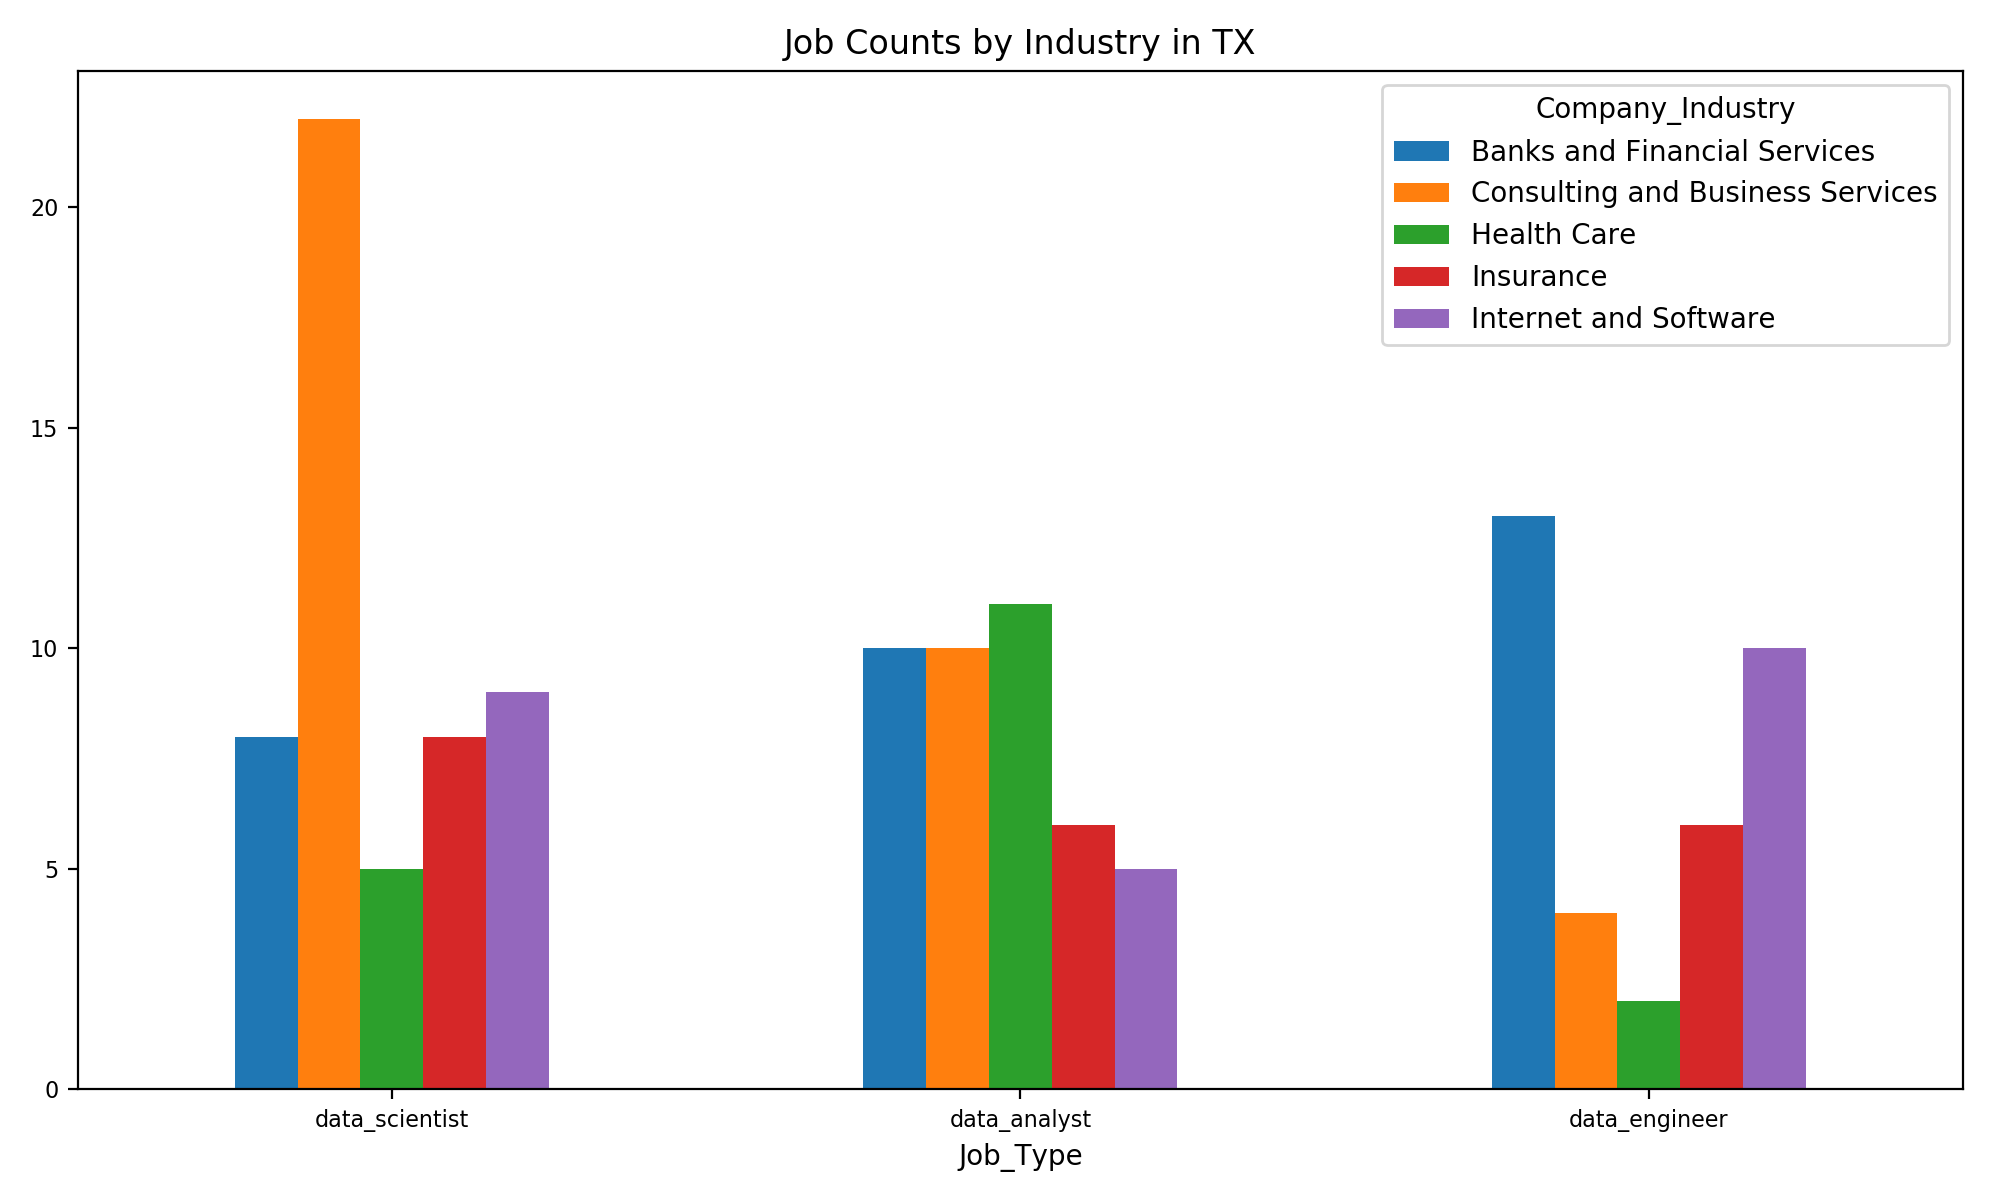

Text(0.5, 1.0, 'Job Counts by Industry in TX')

In [61]:
Industrygraph(df_texas,"Job_Type","Company_Industry")
plt.title("Job Counts by Industry in TX")

<IPython.core.display.Javascript object>


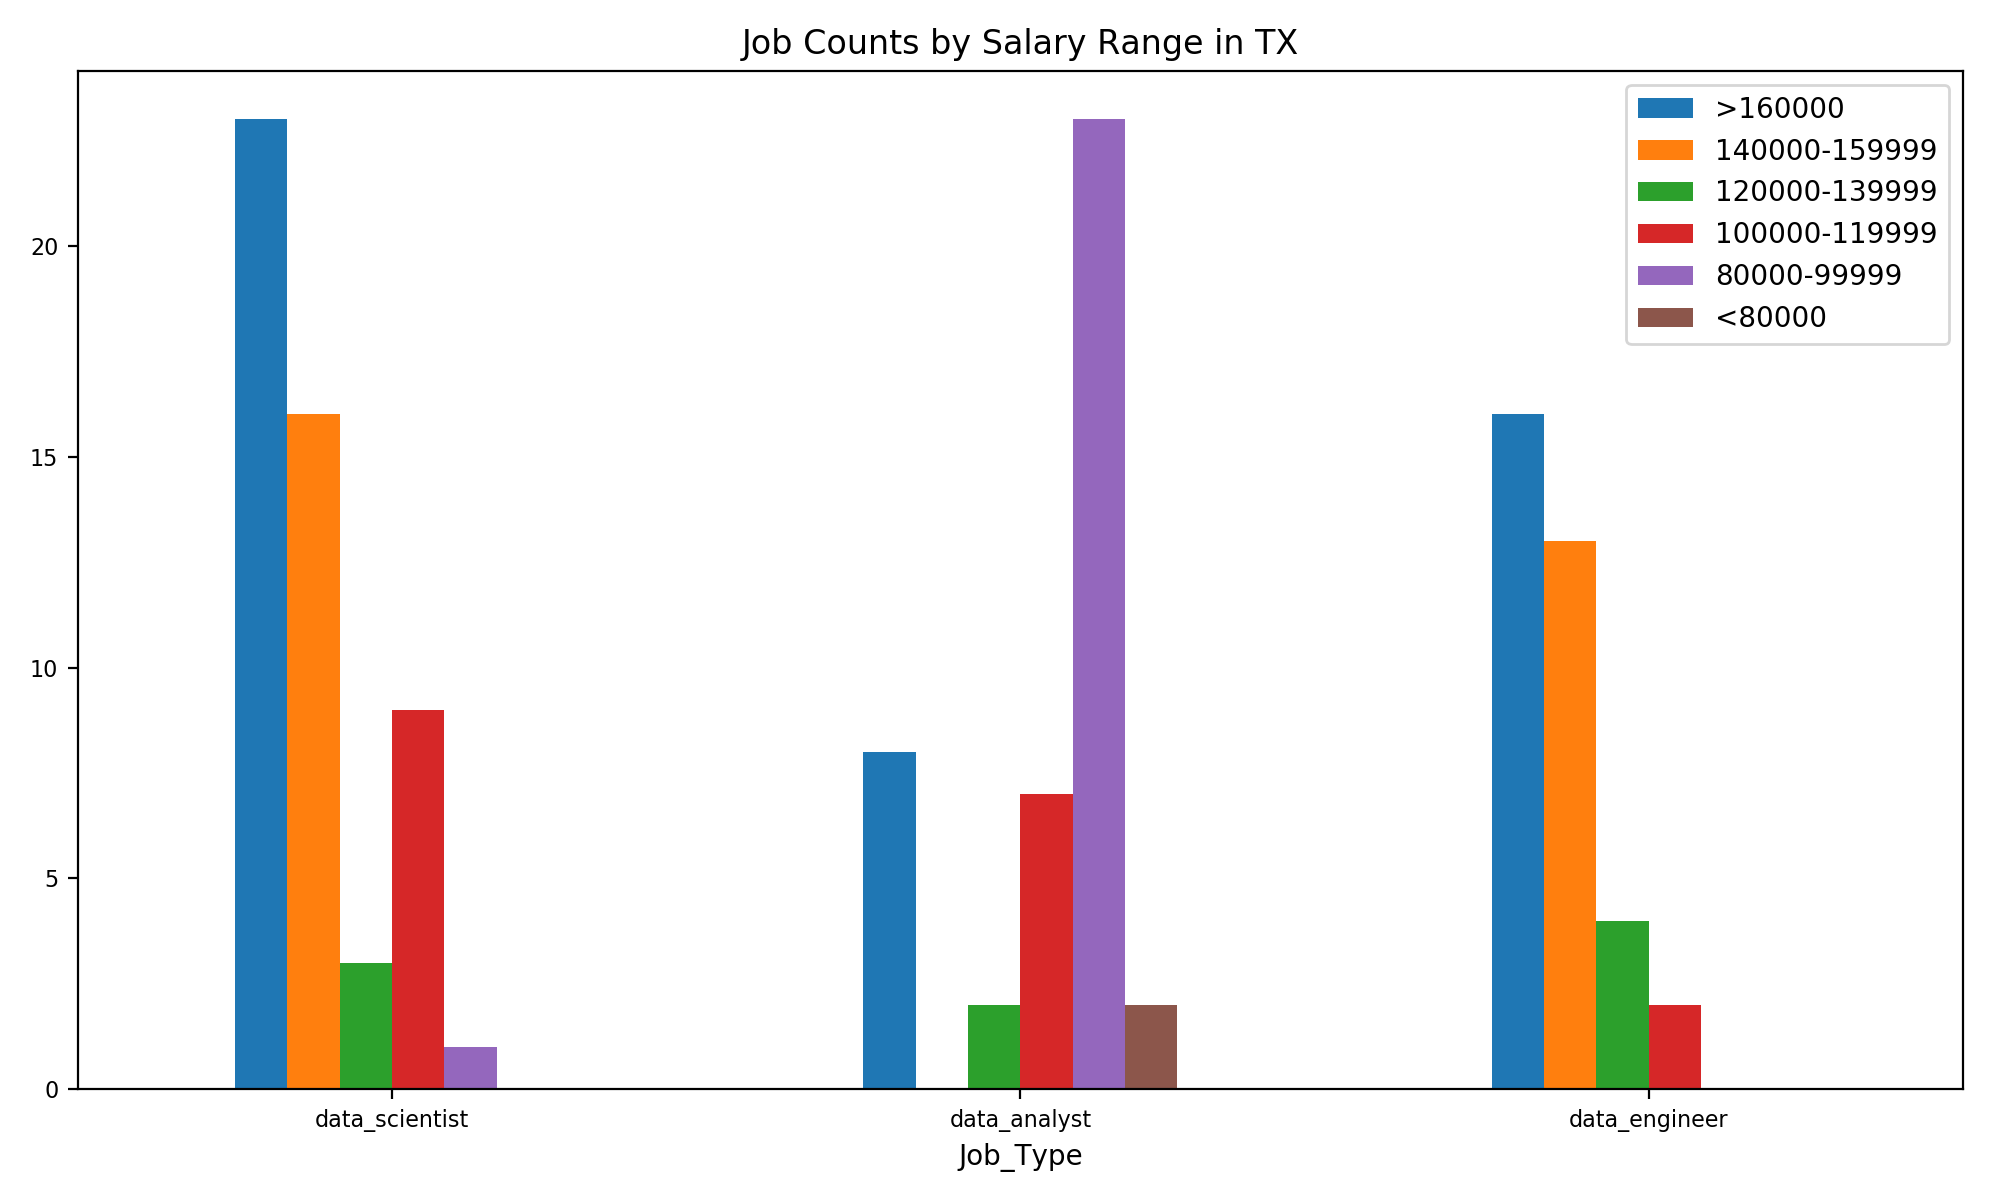

Text(0.5, 1.0, 'Job Counts by Salary Range in TX')

In [122]:
Industrygraph2(df_texas,"Job_Type","Queried_Salary")
plt.title("Job Counts by Salary Range in TX")

In [70]:
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


In [121]:
df_best = df_main.groupby(["Company_Industry","Queried_Salary"])["Job_Title"].count()
df_best = pd.DataFrame(df_best).reset_index().set_index("Company_Industry").pivot(columns = "Queried_Salary", values = "Job_Title")
df_best["Total"] = df_best

Queried_Salary,100000-119999,120000-139999,140000-159999,80000-99999,<80000,>160000
Company_Industry,,,,,,
Aerospace and Defense,36.0,28.0,20.0,23.0,20.0,2.0
Agriculture and Extraction,4.0,5.0,5.0,3.0,1.0,NaN
Auto,14.0,12.0,4.0,7.0,6.0,2.0
Banks and Financial Services,111.0,119.0,73.0,77.0,38.0,41.0
Computers and Electronics,22.0,29.0,15.0,16.0,7.0,10.0
Construction,7.0,3.0,NaN,2.0,3.0,1.0
Consulting and Business Services,183.0,191.0,101.0,115.0,62.0,81.0
Consumer Goods and Services,30.0,24.0,14.0,13.0,15.0,2.0
Education and Schools,18.0,5.0,1.0,27.0,70.0,NaN


# Statistics

In [64]:
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


In [66]:
df_main.groupby(["Job_Type"]).count()

,Job_Title,Queried_Salary,Skill,No_of_Skills,Company,Location,Company_Industry
Job_Type,,,,,,,
data_analyst,1793,1793,1630,1793,1787,1791,1199
data_engineer,1379,1379,1357,1379,1304,1131,893
data_scientist,2543,2543,2496,2543,2520,2541,1734


In [68]:
df_main.groupby(["Company_Industry"]).count()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location
Company_Industry,,,,,,,
Aerospace and Defense,129,129,129,127,129,129,129
Agriculture and Extraction,18,18,18,18,18,18,18
Auto,45,45,45,42,45,45,45
Banks and Financial Services,459,459,459,455,459,459,459
Computers and Electronics,99,99,99,99,99,99,99
Construction,16,16,16,14,16,16,16
Consulting and Business Services,733,733,733,712,733,733,729
Consumer Goods and Services,98,98,98,97,98,98,98
Education and Schools,121,121,121,108,121,121,121


In [74]:
df_main.head()

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,TX,Banks and Financial Services


In [100]:
df_main.loc[df_main["Company_Industry"] == "Consulting and Business Services", :]["Job_Type"].count()

733

In [124]:
df_main["Company_Industry"].value_counts().head()

Consulting and Business Services    733
Internet and Software               647
Banks and Financial Services        459
Health Care                         339
Insurance                           227
Name: Company_Industry, dtype: int64

In [138]:
df_banks = df_main.loc[df_main["Company_Industry"] == "Insurance", :]
df_analyst = df_banks.loc[df_main["Job_Type"] == "data_analyst", :]["Job_Type"].count()
df_scientist = df_banks.loc[df_main["Job_Type"] == "data_scientist", :]["Job_Type"].count()
df_engineer = df_banks.loc[df_main["Job_Type"] == "data_engineer", :]["Job_Type"].count()

observed = [df_analyst, df_scientist, df_engineer]

In [139]:
e1 = 227/3

In [140]:
expected = [e1,e1,e1]

In [141]:
print("Chi-Squared Consulting")
stats.chisquare(observed,expected)

Chi-Squared Consulting


Power_divergenceResult(statistic=3.1806167400881056, pvalue=0.20386273687919865)

In [145]:
Chi_table = pd.DataFrame({"Industry": ["Consulting and Business Services","Internet and Software","Banks and Financial Services",\
                         "Health Care", "Insurance"],           
                         "P-Value": ["3.582571250930323e-27",\
                                     "1.110815701387032e-22","0.13711598512450388",\
                                    "9.817713315522616e-11","0.20386273687919865"]})
Chi_table

,Industry,P-Value
0,Consulting and Business Services,3.582571250930323e-27
1,Internet and Software,1.110815701387032e-22
2,Banks and Financial Services,0.13711598512450388
3,Health Care,9.817713315522616e-11
4,Insurance,0.20386273687919865
